In [23]:
from prophet import Prophet
import numpy as np
from datetime import date, timedelta, datetime
import seaborn as sns
import pandas as pd

In [4]:
model = Prophet()

In [15]:
def make_dates() -> list[date]:
    start = date(2023, 1, 1)
    num = 720
    return [start + timedelta(days=i) for i in range(num)]

In [8]:
dates = make_dates()

In [13]:
def to_yod(d: date) -> int:
    dt = datetime(d.year, d.month, d.day)
    return dt.timetuple().tm_yday  

In [18]:
def make_ys(dates: list[date]) -> list[float]:
    n = len(dates)
    xs = np.array(list(map(to_yod, dates)))
    xs2 = 2 * np.pi * xs / 365
    return np.sin(xs2) + np.random.normal(size=n)

In [19]:
ys = make_ys(dates)

<AxesSubplot: >

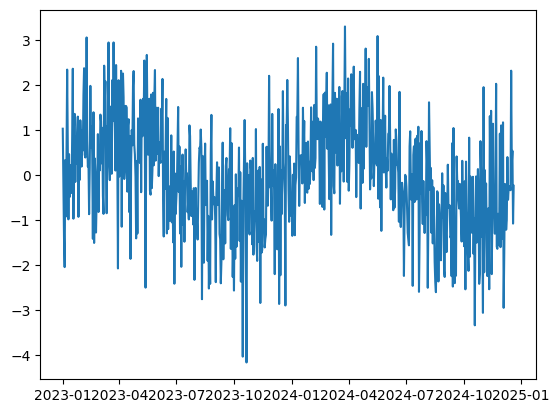

In [22]:
sns.lineplot(x=dates, y=ys)

In [24]:
df = pd.DataFrame({
    "ds": dates,
    "y": ys
})

In [25]:
model = Prophet()
model.fit(df)

03:47:35 - cmdstanpy - INFO - Chain [1] start processing
03:47:35 - cmdstanpy - INFO - Chain [1] done processing
03:47:35 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 6 Unknown error: -6
Optimization terminated abnormally. Falling back to Newton.
03:47:35 - cmdstanpy - INFO - Chain [1] start processing
03:47:35 - cmdstanpy - INFO - Chain [1] done processing
03:47:35 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 6 Unknown error: -6


RuntimeError: Error during optimization! Command '/Users/hotoku/.pyenv/versions/3.10.5/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin random seed=48047 data file=/var/folders/wp/l8ngdzcj15l0vbrgtph9h_5r0000gn/T/tmp52idm7ki/of29usle.json init=/var/folders/wp/l8ngdzcj15l0vbrgtph9h_5r0000gn/T/tmp52idm7ki/ee0loxob.json output file=/var/folders/wp/l8ngdzcj15l0vbrgtph9h_5r0000gn/T/tmp52idm7ki/prophet_modelu79i11ew/prophet_model-20230708034735.csv method=optimize algorithm=newton iter=10000' failed: console log output:

dyld[81148]: Library not loaded: '@rpath/libtbb.dylib'
  Referenced from: '/Users/hotoku/.pyenv/versions/3.10.5/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin'
  Reason: tried: '/private/var/folders/wp/l8ngdzcj15l0vbrgtph9h_5r0000gn/T/pip-install-18lsnchu/prophet_37e28248cb42449fb6f8971a1d4d5880/build/lib.macosx-12.5-arm64-cpython-310/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/private/var/folders/wp/l8ngdzcj15l0vbrgtph9h_5r0000gn/T/pip-install-18lsnchu/prophet_37e28248cb42449fb6f8971a1d4d5880/build/lib.macosx-12.5-arm64-cpython-310/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/private/var/folders/wp/l8ngdzcj15l0vbrgtph9h_5r0000gn/T/pip-install-18lsnchu/prophet_37e28248cb42449fb6f8971a1d4d5880/build/lib.macosx-12.5-arm64-cpython-310/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/private/var/folders/wp/l8ngdzcj15l0vbrgtph9h_5r0000gn/T/pip-install-18lsnchu/prophet_37e28248cb42449fb6f8971a1d4d5880/build/lib.macosx-12.5-arm64-cpython-310/prophet/stan_model/cmdstan-2.31.0/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/usr/local/lib/libtbb.dylib' (no such file), '/usr/lib/libtbb.dylib' (no such file)


M1 Macでpip install prophetだと何かが足らないぽい